In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv('datasets/train.csv', usecols=['Age', 'Fare', 'Survived'])
df.sample(3)

,Survived,Age,Fare
712,1,48.0,52.0
546,1,19.0,26.0
144,0,18.0,11.5


In [17]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [18]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [20]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [21]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [23]:
X_train.sample(5)

,Age,Fare,Age_imputed
72,21.0,73.5000,21.0
135,23.0,15.0458,23.0
19,NaN,7.2250,25.0
189,36.0,7.8958,36.0
276,45.0,7.7500,45.0


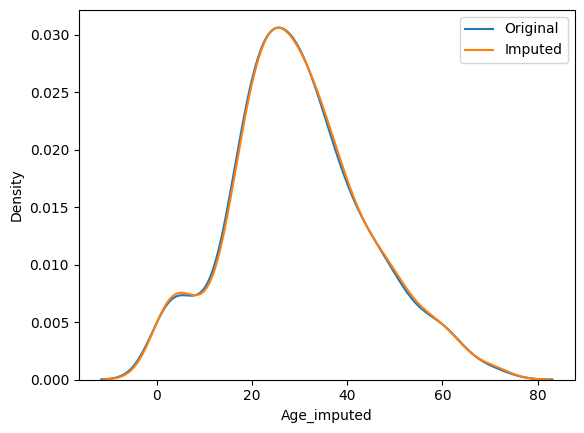

In [28]:
sns.distplot(X_train['Age'], label='Original', hist=False)
sns.distplot(X_train['Age_imputed'], label='Imputed', hist=False)

plt.legend()
plt.show()


In [29]:
print('Original Variance:', X_train['Age'].var())
print('Variance after random imputation:', X_train['Age_imputed'].var())

Original Variance: 204.34951339046142
Variance after random imputation: 206.33332571765519


In [30]:
X_train[['Age', 'Fare', 'Age_imputed']].cov()

,Age,Fare,Age_imputed
Age,204.349513,71.512440,204.349513
Fare,71.512440,2368.246832,67.608716
Age_imputed,204.349513,67.608716,206.333326


<Axes: >

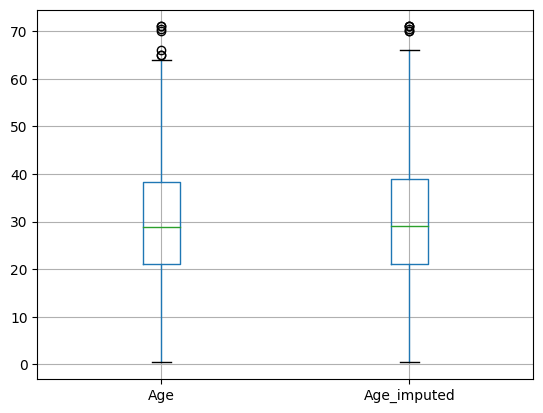

In [32]:
X_train[['Age', 'Age_imputed']].boxplot()